In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import datetime as dt

In [16]:
df = pd.read_csv("Resources/all_departments_percent.csv")

df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.181818
1,8844,1995-12-15,0.000000
2,15602,1995-12-22,0.000000
3,31357,1995-12-22,0.333333
4,11862,1995-02-10,0.500000
...,...,...,...
30921,390959,2000-10-22,0.250000
30922,289923,2000-10-03,0.000000
30923,222848,1995-01-01,0.000000
30924,30840,1991-05-13,0.500000


In [17]:
# sort data by release_date
df=df.sort_values("release_date")

df

,movie_id,release_date,percent_female
14122,83015,1950-01-01,0.0
17992,43387,1950-01-01,0.0
20380,43395,1950-01-01,0.0
18407,109364,1950-01-01,0.0
25041,51411,1950-01-04,0.0
...,...,...,...
24202,302349,2018-03-01,0.0
26797,332283,2018-04-25,0.0
22363,38700,2018-11-07,0.0
27230,299782,2018-12-31,0.0


In [18]:
# change release_date column from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [20]:
# strip year from datetime column and make into new column
df['year'] = df['release_date'].dt.year 

In [21]:
df

,movie_id,release_date,percent_female,year
14122,83015,1950-01-01,0.0,1950
17992,43387,1950-01-01,0.0,1950
20380,43395,1950-01-01,0.0,1950
18407,109364,1950-01-01,0.0,1950
25041,51411,1950-01-04,0.0,1950
...,...,...,...,...
24202,302349,2018-03-01,0.0,2018
26797,332283,2018-04-25,0.0,2018
22363,38700,2018-11-07,0.0,2018
27230,299782,2018-12-31,0.0,2018


In [22]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year                       int64
dtype: object

In [23]:
# group by year and average female_percent for all movies that year
count_df = df.groupby(['year'])['percent_female'].mean()

In [24]:
count_df

year
1950    0.027519
1951    0.032495
1952    0.033517
1953    0.033427
1954    0.025205
          ...   
2015    0.213115
2016    0.207245
2017    0.252746
2018    0.000000
2020    0.000000
Name: percent_female, Length: 70, dtype: float64

In [25]:
# turn series to dataframe 
dataframe = count_df.to_frame()

DONT RERUN

In [26]:
#change year from axis to column 
dataframe = dataframe.rename_axis('year').reset_index()

In [27]:
dataframe

,year,percent_female
0,1950,0.027519
1,1951,0.032495
2,1952,0.033517
3,1953,0.033427
4,1954,0.025205
...,...,...
65,2015,0.213115
66,2016,0.207245
67,2017,0.252746
68,2018,0.000000


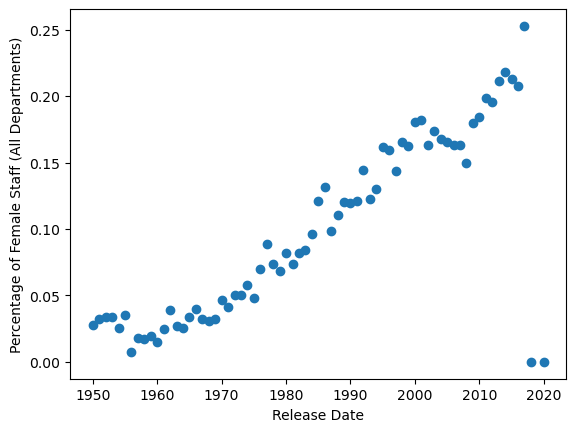

In [28]:
plt.scatter(dataframe.year, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Departments)')
plt.show()

In [29]:
X = dataframe.year.values.reshape(-1, 1)

In [30]:
X

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [20

In [31]:
X.shape

(70, 1)

In [32]:
y = dataframe.percent_female

y

0     0.027519
1     0.032495
2     0.033517
3     0.033427
4     0.025205
        ...   
65    0.213115
66    0.207245
67    0.252746
68    0.000000
69    0.000000
Name: percent_female, Length: 70, dtype: float64

In [35]:
model = LinearRegression()

In [36]:
model.fit(X, y)

LinearRegression()

In [37]:
y_pred = model.predict(X)
print(y_pred.shape)

(70,)


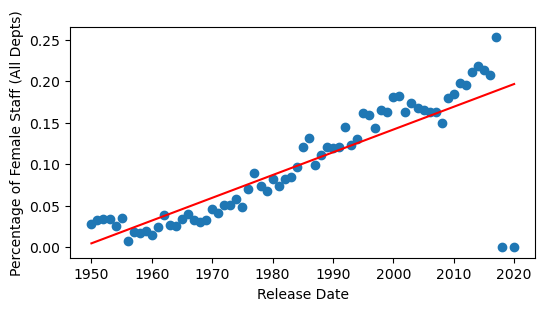

In [39]:
plt.figure(figsize=(6,3))

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Depts)')

plt.show()

In [40]:
print(model.coef_)
print(model.intercept_)

[0.00273971]
-5.337770995618621
